In [1]:
#pip install keras==2.7.0

In [2]:
#!pip install tensorflow==2.7.0
#!pip install pydot
#!conda install python=3.7.6

In [3]:
#pip install seaborn

In [4]:
# Basic Libraries
import numpy as np
import pandas as pd

# Visualization libraries
import matplotlib.pyplot as plt
import pydot
import seaborn as sns

#Evaluation library
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

# Deep Learning libraries
import tensorflow as tf
from tensorflow.keras import layers
import keras
from keras.models import Sequential
from keras.layers.core import Dense,Activation,Dropout
from keras.datasets import mnist
from keras.utils.np_utils import to_categorical
from keras.wrappers.scikit_learn import KerasClassifier

In [5]:
(X_train_digit,y_train_digit),(X_test_digit,y_test_digit)=mnist.load_data()

In [6]:
X_train_digit[1]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  51, 159, 253, 159,  50,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  48, 238, 252, 252, 252, 237,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [7]:
y_train_digit

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

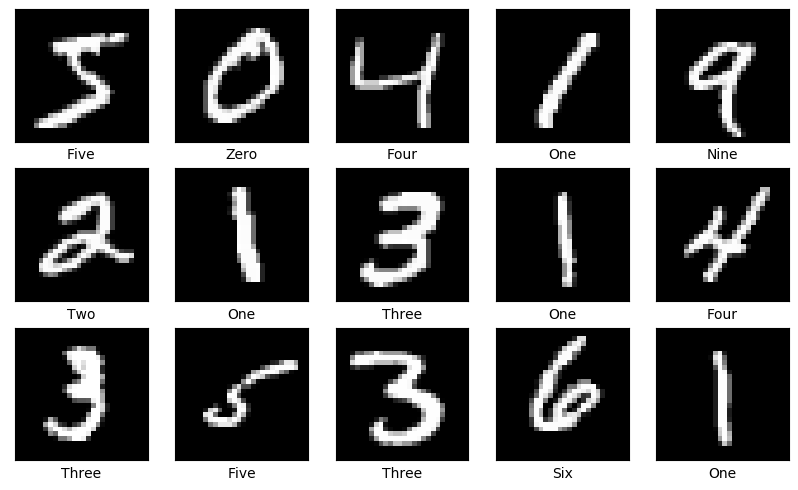

In [8]:
#Names of numbers in the dataset in order
col_names=['Zero','One','Two','Three','Four','Five','Six','Seven','Eight','Nine']
#Visualizing the digits
plt.figure(figsize=(10,10))
for i in range(15):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(X_train_digit[i],cmap='gray')
    plt.xlabel(col_names[y_train_digit[i]])
plt.show()
    

In [9]:
X_train_digit.shape

(60000, 28, 28)

In [10]:
X_train_digit=X_train_digit.reshape(60000,784)
X_test_digit=X_test_digit.reshape(10000,784)

In [11]:
X_train_digit.shape

(60000, 784)

In [12]:
y_test_digit.shape

(10000,)

In [13]:
#Encoding Digit MNIST Labels
y_train_digit=to_categorical(y_train_digit,num_classes=10)
y_test_digit=to_categorical(y_test_digit,num_classes=10)

In [14]:
y_train_digit[1]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [15]:
#Creating base neural network
model=keras.Sequential([
    layers.Dense(256,activation='relu',input_shape=(784,)),
    #layers.Dropout(0.3),
    #layers.BatchNormalization(),
    layers.Dense(64,activation='relu'),
    #layers.Dropout(0.3),
    #layers.BatchNormalization(),
    layers.Dense(64,activation='relu'),
    #layers.Dropout(0.3),
    #layers.BatchNormalization(),
    layers.Dense(10,activation='sigmoid'),
])

In [16]:
#param_number=output channel number *(input channel number+1)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 64)                16448     
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dense_3 (Dense)             (None, 10)                650       
                                                                 
Total params: 222,218
Trainable params: 222,218
Non-trainable params: 0
_________________________________________________________________


In [21]:
#Compiling the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [22]:
history=model.fit(X_train_digit, y_train_digit, batch_size=100, epochs=10,validation_data=(X_test_digit, y_test_digit))

Epoch 1/10
600/600 [==============================] - 8s 8ms/step - loss: 1.6297 - accuracy: 0.8177 - val_loss: 0.3731 - val_accuracy: 0.9049
Epoch 2/10
600/600 [==============================] - 4s 7ms/step - loss: 0.2669 - accuracy: 0.9272 - val_loss: 0.2485 - val_accuracy: 0.9332
Epoch 3/10
600/600 [==============================] - 4s 7ms/step - loss: 0.1831 - accuracy: 0.9487 - val_loss: 0.2465 - val_accuracy: 0.9364
Epoch 4/10
600/600 [==============================] - 3s 5ms/step - loss: 0.1458 - accuracy: 0.9587 - val_loss: 0.1945 - val_accuracy: 0.9487
Epoch 5/10
600/600 [==============================] - 4s 7ms/step - loss: 0.1246 - accuracy: 0.9639 - val_loss: 0.1769 - val_accuracy: 0.9545
Epoch 6/10
600/600 [==============================] - 5s 9ms/step - loss: 0.1111 - accuracy: 0.9680 - val_loss: 0.1794 - val_accuracy: 0.9590
Epoch 7/10
600/600 [==============================] - 4s 7ms/step - loss: 0.0939 - accuracy: 0.9732 - val_loss: 0.1814 - val_accuracy: 0.9577
Epoch 

In [23]:
#Predicting the labels-DIGIT
y_predict=model.predict(X_test_digit)

In [24]:
y_predict[0]

array([3.5145879e-04, 9.9996287e-01, 8.5958666e-01, 9.8304558e-01,
       8.3081836e-01, 7.3140621e-02, 9.9729157e-12, 1.0000000e+00,
       3.7516296e-02, 9.9885857e-01], dtype=float32)

In [26]:
y_predicts=np.argmax(y_predict,axis=1) #Here we get the index of maximum value in the encoded vector

In [27]:
y_predicts

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [28]:
y_test_digit_eval=np.argmax(y_test_digit,axis=1)

In [29]:
y_test_digit_eval

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

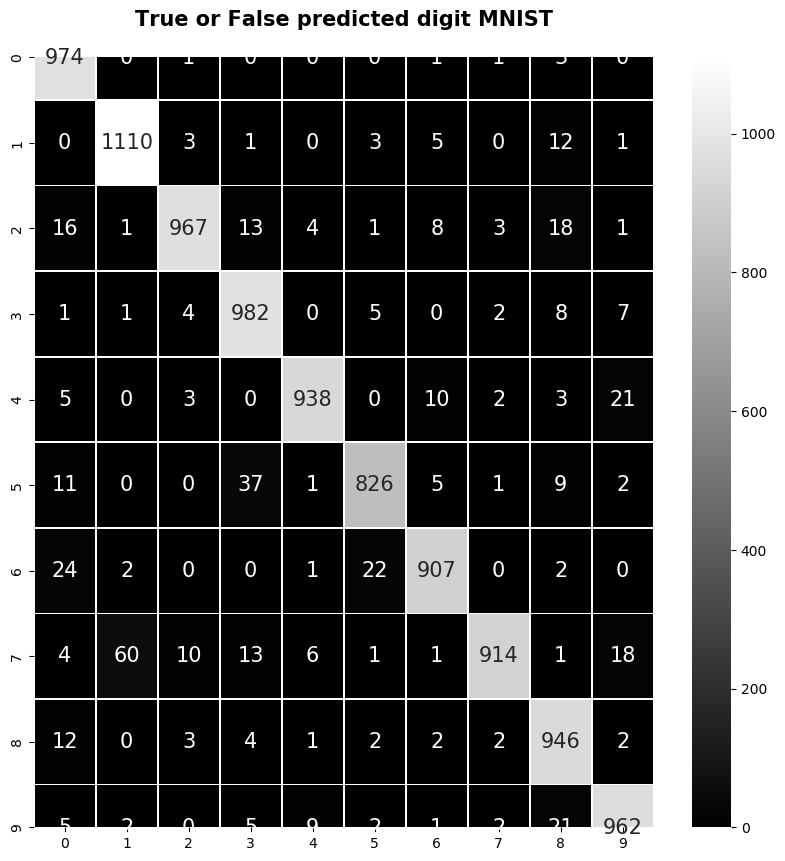

In [31]:
#Confusion matrix for Digit MNIST
con_mat=confusion_matrix(y_test_digit_eval,y_predicts)
plt.style.use('seaborn-deep')
plt.figure(figsize=(10,10))
sns.heatmap(con_mat,annot=True,annot_kws={'size': 15},linewidths=0.5,fmt="d",cmap="gray")
plt.title('True or False predicted digit MNIST\n',fontweight='bold',fontsize=15)
plt.show()

In [32]:
from sklearn.metrics import classification_report
print(classification_report(y_test_digit_eval,y_predicts))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96       980
           1       0.94      0.98      0.96      1135
           2       0.98      0.94      0.96      1032
           3       0.93      0.97      0.95      1010
           4       0.98      0.96      0.97       982
           5       0.96      0.93      0.94       892
           6       0.96      0.95      0.96       958
           7       0.99      0.89      0.94      1028
           8       0.92      0.97      0.95       974
           9       0.95      0.95      0.95      1009

    accuracy                           0.95     10000
   macro avg       0.95      0.95      0.95     10000
weighted avg       0.95      0.95      0.95     10000



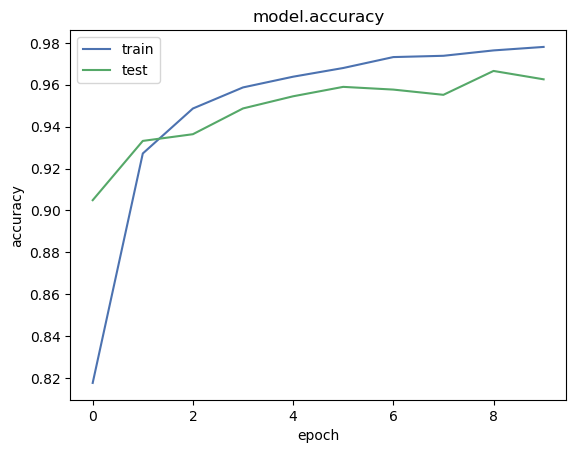

In [33]:
#summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model.accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='best')
plt.show()

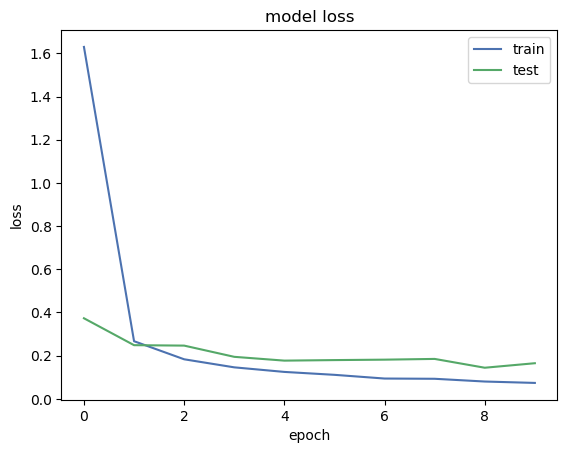

In [34]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='best')
plt.show()

In [36]:
#tf.expand_dims(X_test_digit[0])
y_predict_single=model.predict(X_test_digit[[2]])
y_predicts_single=np.argmax(y_predict_single,axis=1)
y_test_digit_eval=np.argmax(y_test_digit,axis=1)

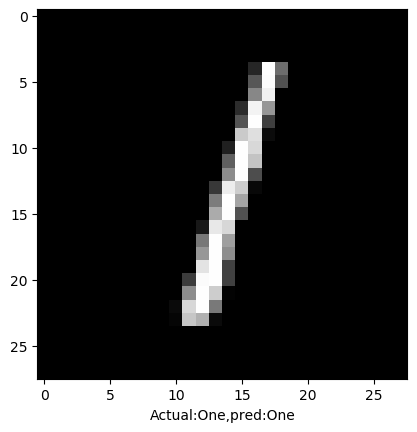

In [37]:
#Names of numbers in the dataset in order
col_names=['Zero','One','Two','Three','Four','Five','Six','Seven','Eight','Nine']
#Visualization the digit
#plt.figure(figsize=(10,10))
plt.imshow(X_test_digit[2].reshape(28,28),cmap='gray')
plt.xlabel("Actual:{},pred:{}".format(col_names[np.argmax(y_test_digit[2])],col_names[y_predicts_single[0]]))
plt.show()